# Fitting Models Exercise 2

## Imports

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [58]:
A=np.load('decay_osc.npz')

In [59]:
tdata = A['tdata']
ydata= A['ydata']
dy = A['dy']

In [60]:
tdata, ydata, dy

(array([  0.23181023,   0.75756308,   0.79449188,   1.06440841,
          1.15442   ,   1.2074788 ,   1.6082512 ,   1.84020235,
          2.26847064,   2.4663936 ,   2.73670264,   3.51277747,
          3.69390206,   4.40311262,   4.92725839,   5.01612571,
          5.45756459,   5.77519885,   5.92089063,   6.34168734,
          7.25390092,   7.53691783,   7.5695311 ,   7.90738928,
          9.14672657,   9.91487324,  10.00612156,  10.90520466,
         11.11871571,  11.2010993 ,  11.54757171,  11.73261207,
         12.33314215,  12.53762032,  12.95405221,  13.2536048 ,
         13.26900451,  14.07723698,  14.38998527,  14.56464101,
         14.97249975,  16.09455364,  16.86871453,  17.01532558,
         18.03660694,  18.76147469,  19.04467933,  19.55174508,
         19.59947156,  19.69287049]),
 array([-5.11971604, -2.84019899, -4.55222367, -1.06305079, -1.09953019,
        -1.92218542, -0.59020311,  1.85089586,  3.16111471,  3.06495644,
         4.48901465,  4.51430527,  3.3223624 ,  

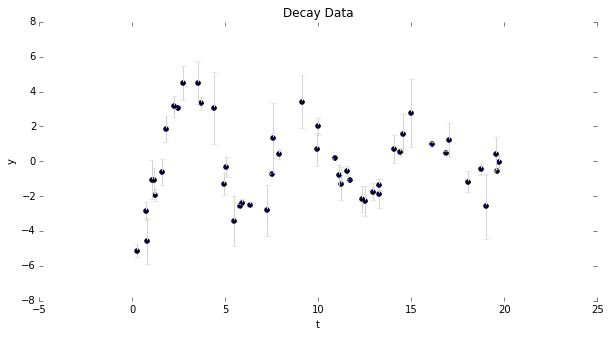

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(tdata,ydata)
plt.errorbar(tdata, ydata, dy,fmt='.k', ecolor='lightgray')
plt.box(False)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Decay Data')

In [62]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [63]:
def exp_model(t, A, B,omega,dl):
    return A*np.exp(-B*t)*np.cos(omega*t) + dl

In [64]:
theta_best, theta_cov = opt.curve_fit(exp_model, tdata, ydata, absolute_sigma=True)

In [65]:
print('A = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('B = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('omega = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))
print('dl = {0:.3f} +/- {1:.3f}'.format(theta_best[3], np.sqrt(theta_cov[3,3])))

A = -5.285 +/- 0.520
B = 0.071 +/- 0.014
omega = -1.012 +/- 0.009
dl = 0.229 +/- 0.147


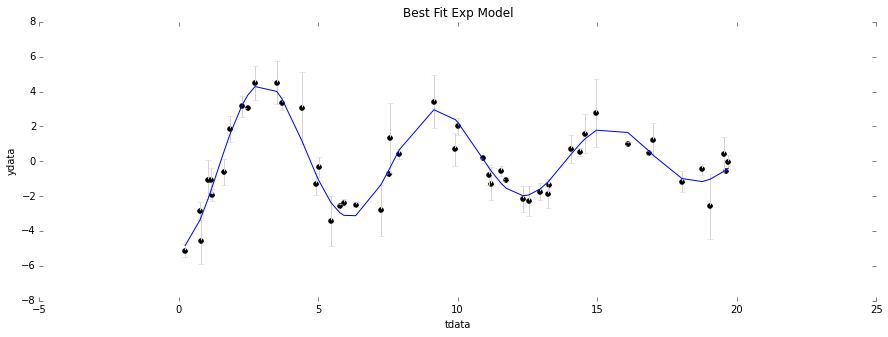

In [67]:
yfit= exp_model(tdata,theta_best[0],theta_best[1],theta_best[2],theta_best[3])
plt.figure(figsize=(15,5))
plt.scatter(tdata,ydata,color='black')
plt.errorbar(tdata, ydata, dy,fmt='.k', ecolor='lightgray')
plt.plot(tdata,yfit)
plt.box(False)
plt.title('Best Fit Exp Model')
plt.ylabel('ydata')
plt.xlabel('tdata')

In [44]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors